In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Load the training and test data
df_train = pd.read_csv('//content//drive//MyDrive//train_data.txt', sep=":::", header=None, engine='python')
df_test = pd.read_csv('//content//drive//MyDrive//test_data.txt', sep=":::", header=None, engine='python')

# Rename columns for easier understanding
df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name', 'confession']


In [11]:
print(df_train.head())

   SN                          movie_name    category  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                          confession  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [6]:
# Select relevant columns
X_train = df_train['confession']  # Movie plots (text data)
y_train = df_train['category']    # Movie genres (target variable)

X_test = df_test['confession']    # Test movie plots


In [7]:
# Convert text data to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # Limiting features for simplicity
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit on train data
X_test_tfidf = tfidf.transform(X_test)        # Transform test data


In [8]:
# Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions on train set
y_pred_nb = nb_model.predict(X_train_tfidf)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_train, y_pred_nb))
print("Classification Report:\n", classification_report(y_train, y_pred_nb))


Naive Bayes Accuracy: 0.5529936916663593


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                precision    recall  f1-score   support

      action        0.69      0.15      0.25      1315
       adult        0.75      0.10      0.18       590
   adventure        0.76      0.09      0.16       775
   animation        1.00      0.01      0.02       498
   biography        0.00      0.00      0.00       265
      comedy        0.56      0.49      0.52      7447
       crime        0.00      0.00      0.00       505
 documentary        0.59      0.89      0.71     13096
       drama        0.48      0.83      0.61     13613
      family        0.86      0.01      0.02       784
     fantasy        0.00      0.00      0.00       323
   game-show        0.97      0.32      0.48       194
     history        0.00      0.00      0.00       243
      horror        0.76      0.46      0.57      2204
       music        0.87      0.24      0.38       731
     musical        0.00      0.00      0.00       277
     mystery        0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predictions on train set
y_pred_lr = lr_model.predict(X_train_tfidf)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_train, y_pred_lr))
print("Classification Report:\n", classification_report(y_train, y_pred_lr))


Logistic Regression Accuracy: 0.6691813922603018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                precision    recall  f1-score   support

      action        0.65      0.43      0.52      1315
       adult        0.82      0.41      0.55       590
   adventure        0.78      0.26      0.39       775
   animation        0.84      0.22      0.35       498
   biography        0.00      0.00      0.00       265
      comedy        0.63      0.70      0.66      7447
       crime        0.63      0.10      0.18       505
 documentary        0.72      0.90      0.80     13096
       drama        0.62      0.84      0.71     13613
      family        0.72      0.18      0.28       784
     fantasy        0.76      0.09      0.16       323
   game-show        0.94      0.62      0.75       194
     history        0.00      0.00      0.00       243
      horror        0.76      0.72      0.74      2204
       music        0.76      0.56      0.64       731
     musical        0.87      0.07      0.13       277
     mystery        0.83      0.06      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [13]:
print(df_train.head())

   SN                          movie_name    category  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                          confession  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


<ipython-input-16-ad8b972199df>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping w

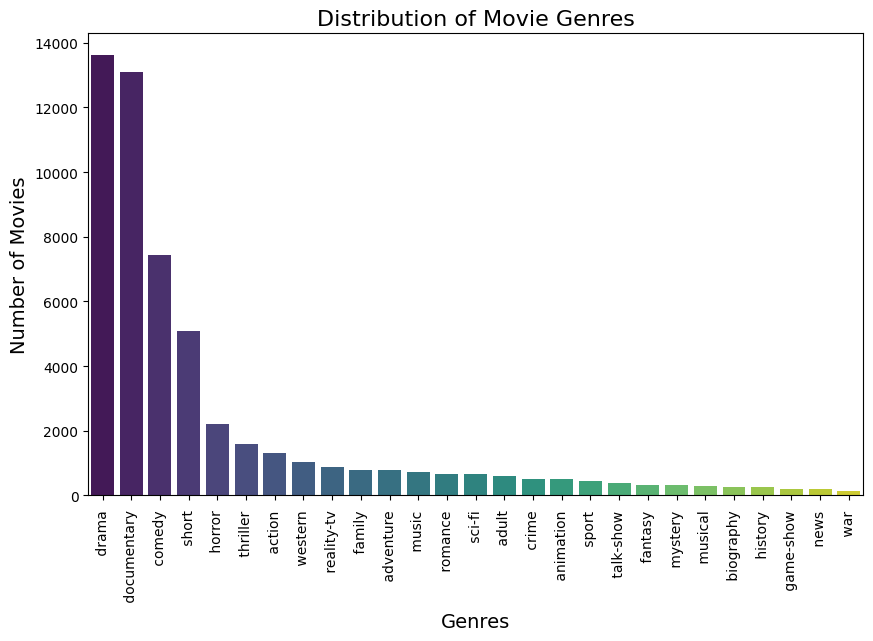

In [16]:
# Count the occurrences of each genre
genre_counts = df_train['category'].value_counts()

# Plot the distribution of genres
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=90)
plt.show()


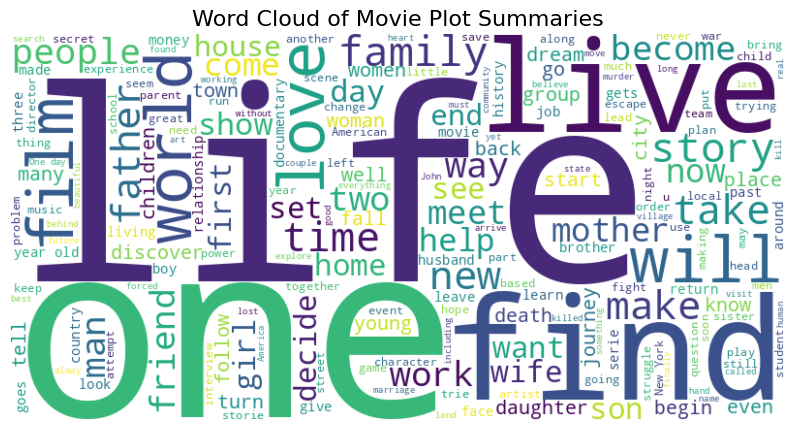

In [18]:
# Combine all movie plots into a single string
text = " ".join(review for review in df_train.confession)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Movie Plot Summaries', fontsize=16)
plt.show()


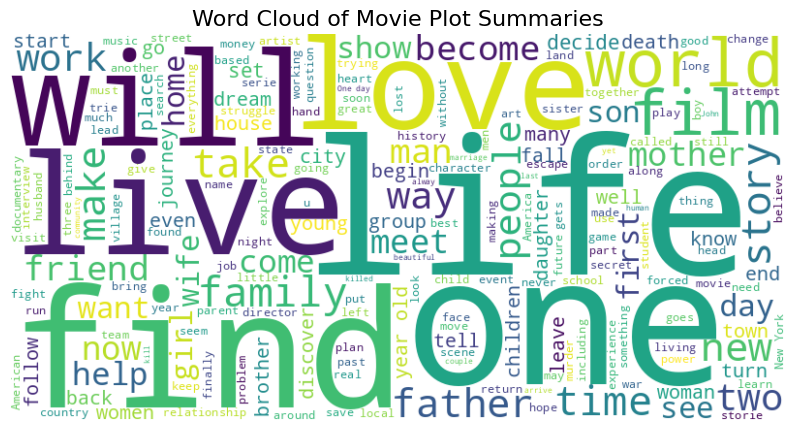

In [19]:
# Combine all movie plots into a single string
text = " ".join(review for review in df_train.confession)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Movie Plot Summaries', fontsize=16)
plt.show()


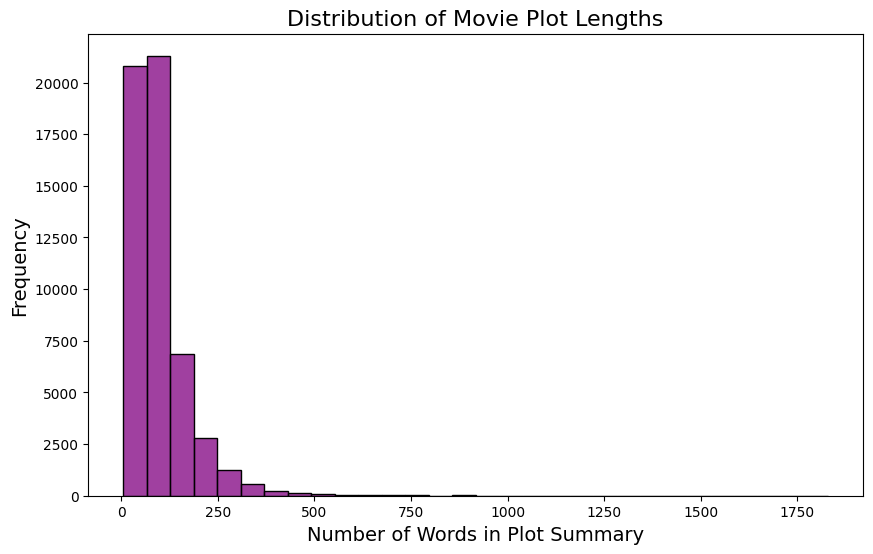

In [20]:
# Calculate the length of each movie plot
df_train['plot_length'] = df_train['confession'].apply(lambda x: len(x.split()))

# Plot the distribution of movie plot lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_train['plot_length'], bins=30, color='purple')
plt.title('Distribution of Movie Plot Lengths', fontsize=16)
plt.xlabel('Number of Words in Plot Summary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()
